In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("DataScience_salaries_2024.csv")


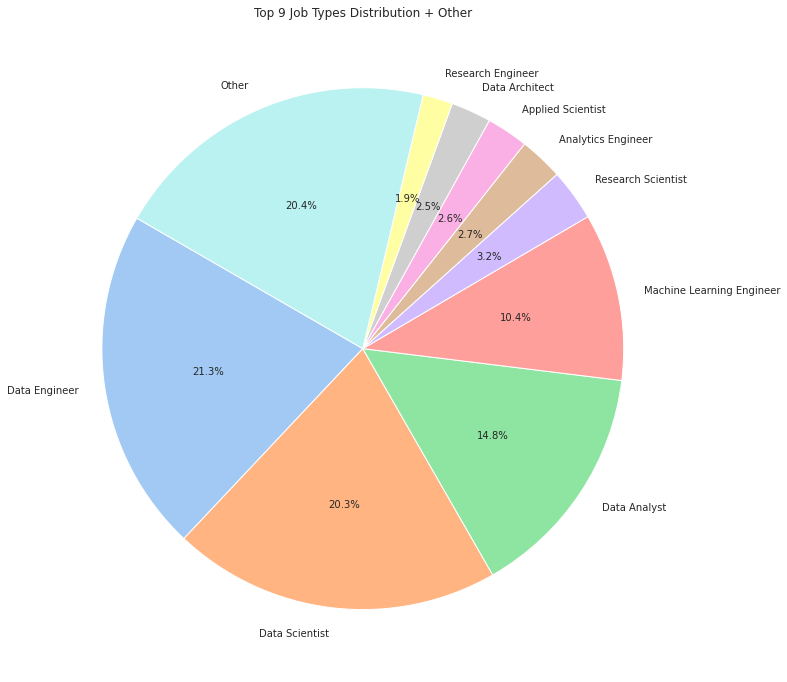

In [3]:

# job titles distributions

job_title_counts = data['job_title'].value_counts()
top_jobs = 9 

top_jobs_title = job_title_counts.head(top_jobs)

other_count = job_title_counts[top_jobs:].sum()

top_jobs_title['Other'] = other_count

sns.set_style("whitegrid")

palette = sns.color_palette("pastel", n_colors=len(top_jobs_title))


plt.figure(figsize=(12, 12))
plt.pie(top_jobs_title, labels=top_jobs_title.index, autopct='%1.1f%%', startangle=150, colors=palette)
plt.title(f'Top {top_jobs} Job Types Distribution + Other')
plt.show()


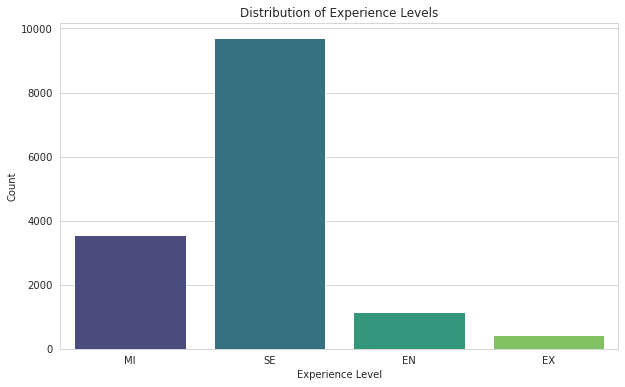

In [4]:

# experience levels distribution

sns.set_style(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='experience_level', palette='viridis')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels')
plt.show()

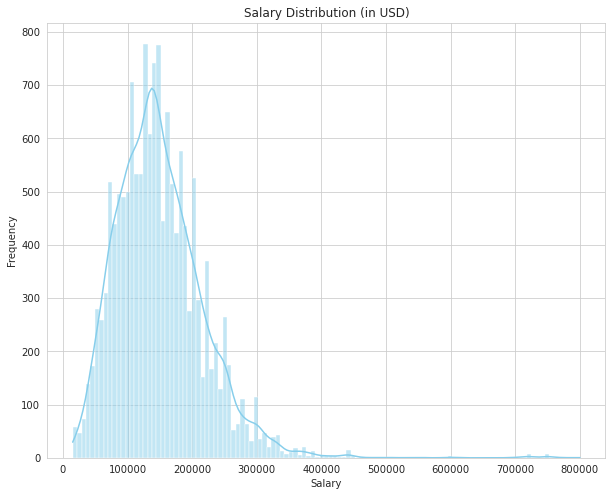

In [5]:

sns.set_style("whitegrid")

# Salary distribution graph
plt.figure(figsize=(10,8))
sns.histplot(data['salary_in_usd'], kde=True, color='skyblue') 
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution (in USD)')
plt.show()


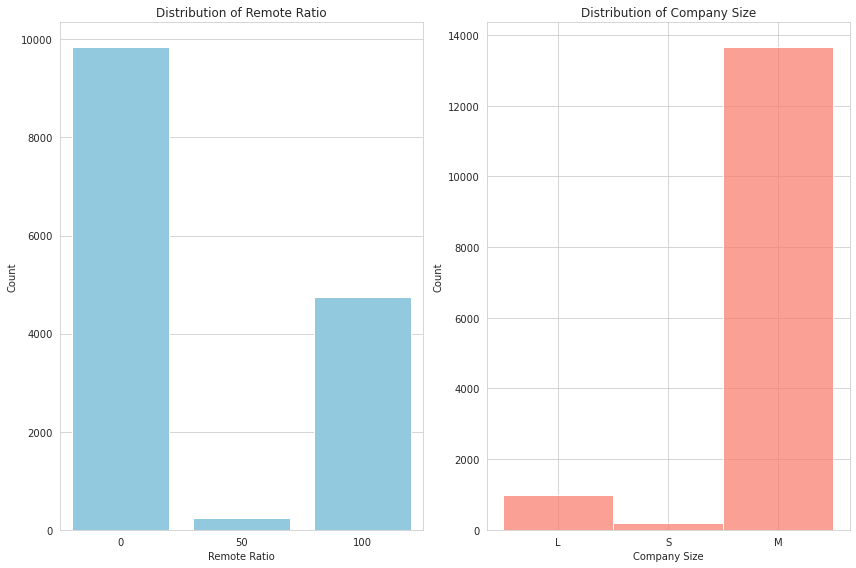

In [6]:


sns.set_style(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot histogram for remote_ratio
sns.countplot(data=data, x='remote_ratio', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Remote Ratio')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Remote Ratio')


# Plot histogram for company_size
sns.histplot(data=data, x='company_size', ax=axes[1], bins=30, color='salmon')
axes[1].set_xlabel('Company Size')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Company Size')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


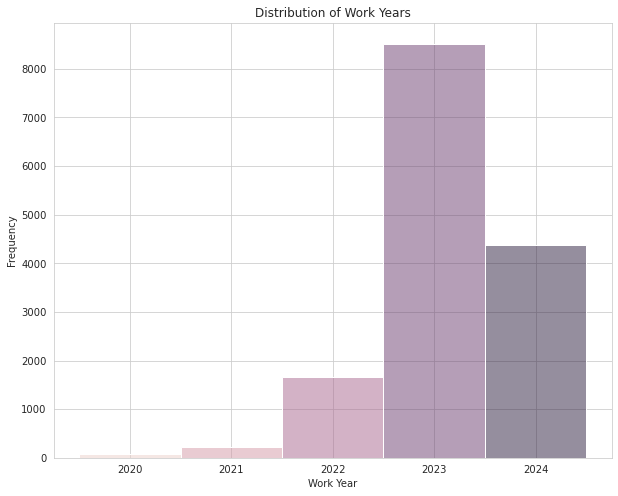

In [7]:
# plot distribution of work_year

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))


sns.histplot(data=data, x='work_year', discrete=True, hue="work_year")

plt.xlabel('Work Year')
plt.ylabel('Frequency')
plt.title('Distribution of Work Years')
plt.legend().set_visible(False)

plt.show()


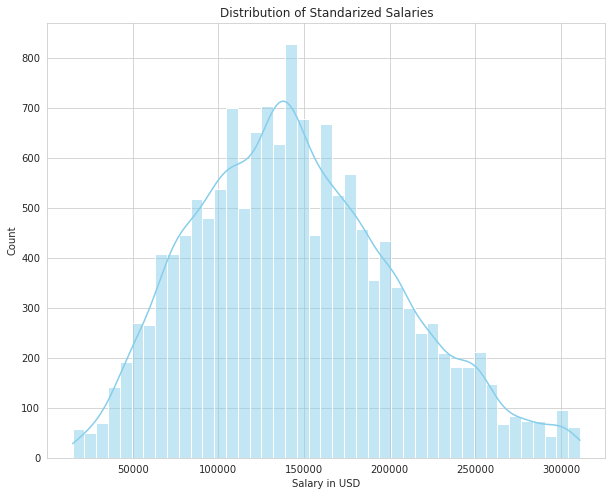

In [8]:

Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)].reset_index().copy()
data.drop('index', axis = 1, inplace = True)
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))

sns.histplot(data['salary_in_usd'], kde=True, color='skyblue') 

plt.title('Distribution of Standarized Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Count')

plt.show()